# READ MLD DATA
to get depth integrated Temp per MLD & N0

In [1]:
from netCDF4 import Dataset, MFDataset
import numpy as np

In [2]:
my_nc_file = 'MLDClimatology_DeBoyerMontagut/mld_DT02_c1m_reg2.0.nc'
fh = Dataset(my_nc_file, mode='r')

In [3]:
fh.variables

OrderedDict([('krig_std_dev', <class 'netCDF4._netCDF4.Variable'>
              float32 krig_std_dev(time, lat, lon)
                  units: meters
                  long_name: statistical std deviation linked to kriging of mld
                  missing_value: -9999.0
                  min_value: 0.0
                  max_value: 213.17142
                  mask_value: 1000000000.0
              unlimited dimensions: time
              current shape = (12, 90, 180)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  units: degrees_N
                  long_name: center mesh latitude
                  min_value: -88.0
                  max_value: 89.5
              unlimited dimensions: 
              current shape = (90,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
    

In [4]:
# mld(time, lat, lon)

In [5]:
mld = fh.variables['mld'][:]
lon = fh.variables['lon'][:]
lat = fh.variables['lat'][:]
time = fh.variables['time'][:]
#print(Chl)

mld_units = fh.variables['mld'].units

In [6]:
fh.close()

In [13]:
mld[3,80,10]

98.93528

In [ ]:
# create shape to save mld data into
ncdat_mld = np.zeros((12, 180, 360))

# TRY XARRAY

In [2]:
import xarray as xr

ds = xr.open_mfdataset('MLDClimatology_DeBoyerMontagut/mld_DT02_c1m_reg2.0.nc',combine='by_coords')

In [10]:
ds.sel(lat=80, lon=12).to_dataframe()

,krig_std_dev,lat,lon,mask,med_dev,mld,mld_raw,mld_smth,n_profiles
time,,,,,,,,,
0001-01-15 12:00:00,28.075478,80.0,12.0,1.0,NaN,45.743469,NaN,NaN,NaN
0001-02-15 12:00:00,43.963947,80.0,12.0,1.0,NaN,33.061035,NaN,NaN,NaN
0001-03-15 12:00:00,33.684181,80.0,12.0,1.0,NaN,104.491768,NaN,NaN,NaN
0001-04-15 12:00:00,31.367615,80.0,12.0,1.0,NaN,59.657814,NaN,NaN,NaN
0001-05-15 12:00:00,0.000000,80.0,12.0,1.0,29.208572,68.781021,100.07,68.781021,7.0
0001-06-15 12:00:00,0.000000,80.0,12.0,1.0,18.330999,21.585196,21.08,21.585196,20.0
0001-07-15 12:00:00,0.000000,80.0,12.0,1.0,3.973750,13.791507,11.97,13.791507,88.0
0001-08-15 12:00:00,0.000000,80.0,12.0,1.0,6.405054,14.712749,13.39,14.712749,93.0
0001-09-15 12:00:00,0.000000,80.0,12.0,1.0,5.170000,17.890123,13.17,17.890123,75.0


# notes:
- i can read the ncdf files as x arrays, which feature easy input output functions
- i can only extract the most exact fits if I want to return a single value
- i can extract a geographic range with slice()
- i can now return the nearest value form lat and lon by first reducing xarray dims

TODO:
- now get the code to filter water temps above MLD (from Climatology) and 
- interpolate and take mean of all temps above MLD to get "SST"


In [57]:
import xarray as xr
import glob

TempNCDFfiles = glob.glob('WOA2018/Temperature/*.nc', recursive=True)

ds2 = xr.open_mfdataset(TempNCDFfiles,combine='by_coords',decode_times=False)

In [73]:
#ds2.variables
ds3 = ds2.sel(nbounds=0, time=371.5+1)

df = ds3.sel(lat=40,lon=-20, method='nearest').to_dataframe()

df

lat   lon         crs  lat_bnds  lon_bnds  depth_bnds  \
depth  time                                                            
0.0    372.5  40.5 -19.5 -2147483647      40.0     -20.0         0.0   
       373.5  40.5 -19.5 -2147483647      40.0     -20.0         0.0   
       374.5  40.5 -19.5 -2147483647      40.0     -20.0         0.0   
       375.5  40.5 -19.5 -2147483647      40.0     -20.0         0.0   
       376.5  40.5 -19.5 -2147483647      40.0     -20.0         0.0   
...            ...   ...         ...       ...       ...         ...   
1500.0 379.5  40.5 -19.5 -2147483647      40.0     -20.0      1475.0   
       380.5  40.5 -19.5 -2147483647      40.0     -20.0      1475.0   
       381.5  40.5 -19.5 -2147483647      40.0     -20.0      1475.0   
       382.5  40.5 -19.5 -2147483647      40.0     -20.0      1475.0   
       383.5  40.5 -19.5 -2147483647      40.0     -20.0      1475.0   

              climatology_bounds      t_an       t_mn  t_dd      t_sd  \
depth  time                                                             
0.0    372.5                 0.0  14.87860  14.765243   8.0  0.403968   
       373.5                 1.0  14.39471  14.585494  23.0  0.552522   
       374.5                 2.0  14.18719  14.013444  18.0  0.814553   
       375.5                 3.0  14.59340  14.430242  13.0  0.645615   
       376.5                 4.0  15.61929  15.573319  15.0  0.987385   
...                          ...       ...        ...   ...       ...   
1500.0 379.5                 7.0   5.46881   5.303387   7.0  0.305868   
       380.5                 8.0   5.40380   5.493583  13.0  0.453310   
       381.5                 9.0   5.40901   5.163136   5.0  0.434501   
       382.5                10.0   5.55111   5.697942   5.0  0.495621   
       383.5                11.0   5.40441   5.751211   3.0  0.359141   

                  t_se      t_oa      t_ma  t_gp  
depth  time                                       
0.0    372.5  0.142824 -0.113358 -2.377490  67.0  
       373.5  0.115209  0.190784 -2.861381  67.0  
       374.5  0.191992 -0.173746 -3.068900  67.0  
       375.5  0.179061 -0.163158 -2.662690  67.0  
       376.5  0.254942 -0.045971 -1.636800  67.0  
...                ...       ...       ...   ...  
1500.0 379.5  0.115607 -0.165423 -0.001480  67.0  
       380.5  0.125726  0.089783 -0.066490  67.0  
       381.5  0.194315 -0.245874 -0.061280  66.0  
       382.5  0.221648  0.146832  0.080820  67.0  
       383.5  0.207350  0.346801 -0.065880  66.0  

[684 rows x 15 columns]

In [68]:
#ds2.sel(lat=80.5, lon=12.5, time=375.5, nbounds=0, method='nearest').to_dataframe()

#ds_loc1

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [9]:
plt.rcParams['figure.figsize'] = [20, 10]

In [10]:
lons, lats = np.meshgrid(lon, lat)

In [11]:
#str(lats),str(lons), str(t_an[0,0,:,:])

In [12]:
#lats[1]

In [15]:
BM1 = mld[1,:,:]

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0.5, 0, 'Global SST WOA climatology')

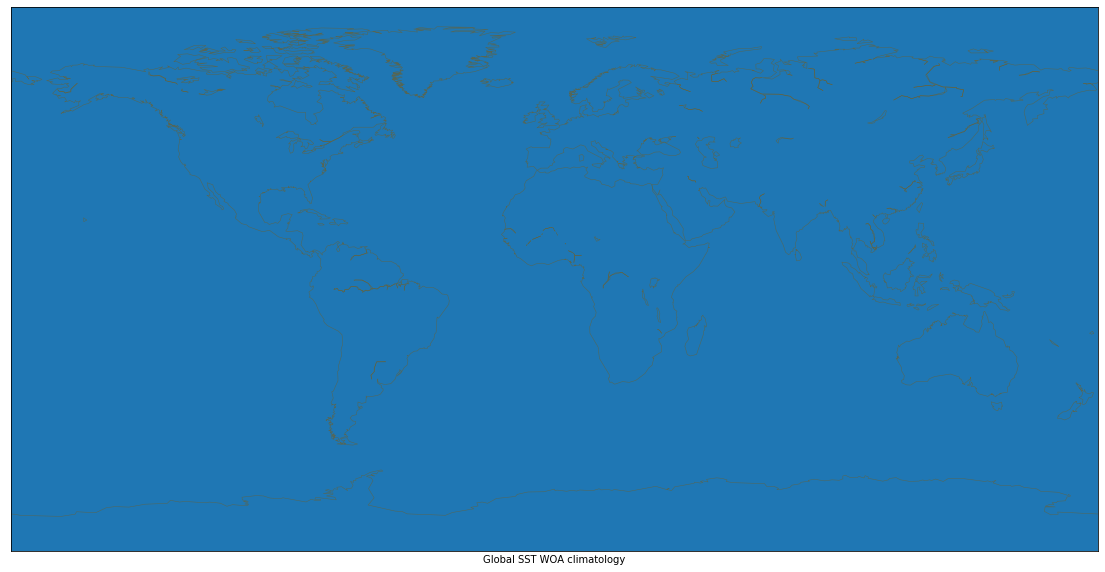

In [16]:
fig, ax = plt.subplots()
earth = Basemap(ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.5)
earth.scatter(lons, lats, BM1)
ax.set_xlabel("Global MLD climatology")